In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from IPython.display import Image
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.neural_network import MLPClassifier
import time

import warnings
warnings.filterwarnings('ignore')
verbose = False

In [2]:
vehicles = pd.read_csv("data/dftRoadSafetyData_Vehicles_2018.csv")
vehicles.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2018010080971,1,9,0,18,0,0,0,0,0,...,6,1,32,6,1995,2,5,8,1,8
1,2018010080971,2,8,0,18,0,0,0,0,0,...,6,1,48,8,1798,8,6,1,1,1
2,2018010080973,1,9,0,18,0,2,0,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010080974,1,8,0,7,0,8,0,0,0,...,1,1,40,7,1797,8,6,3,1,3
4,2018010080974,2,9,0,18,0,1,0,0,3,...,6,1,21,5,-1,-1,-1,5,1,5


In [3]:
accidents = pd.read_csv("data/dftRoadSafetyData_Accidents_2018.csv")
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01000854
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01003531
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,...,0,5,4,1,1,0,0,1,1,E01002723
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,...,0,5,4,2,2,0,0,1,1,E01003492
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,...,0,0,4,1,2,0,0,1,1,E01001682


In [4]:
casualties = pd.read_csv("data/dftRoadSafetyData_Casualties_2018.csv")
casualties.head()
casualties.shape[0]

160597

In [5]:
df = vehicles.merge(accidents, how='inner', on='Accident_Index')
df = df.merge(casualties, how='inner', on='Accident_Index')
df.head()


,Accident_Index,Vehicle_Reference_x,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2018010135259,1,9,0,-1,-1,-1,-1,-1,-1,...,4,3,0,0,0,0,0,9,2,8
1,2018010135259,2,9,0,-1,-1,-1,-1,-1,-1,...,4,3,0,0,0,0,0,9,2,8
2,2018010135261,1,11,0,18,0,1,0,-1,0,...,6,3,10,9,0,0,2,0,1,1
3,2018010135264,1,9,0,16,0,1,0,0,0,...,6,3,5,3,0,0,2,0,1,2
4,2018010135268,1,9,0,18,0,4,0,0,0,...,10,3,0,0,1,0,0,9,1,10


In [6]:
population = pd.read_excel("data/regionalgrossdomesticproductgdplocalauthorities.xlsx", sheet_name=6, header=1, nrows=382)
population = population[["LA name", 2018]]
population = population.rename({2018:"Population"}, axis=1)
population.head()

,LA name,Population
0,Hartlepool,93242
1,Middlesbrough,140545
2,Redcar and Cleveland,136718
3,Stockton-on-Tees,197213
4,Darlington,106566


In [7]:
gdp = pd.read_excel("data/regionalgrossdomesticproductgdplocalauthorities.xlsx", sheet_name=7, header=1, nrows=382)
gdp = gdp[["LA name", '20183']]
gdp = gdp.rename({'20183':"GDP"}, axis=1)
gdp.head()

,LA name,GDP
0,Hartlepool,18572
1,Middlesbrough,24103
2,Redcar and Cleveland,15793
3,Stockton-on-Tees,29843
4,Darlington,28866


In [8]:
gdp_growth = pd.read_excel("data/regionalgrossdomesticproductgdplocalauthorities.xlsx", sheet_name=13, header=1, nrows=382)
gdp_growth = gdp_growth[["LA name", '20183']]
gdp_growth = gdp_growth.rename({'20183':"GDP Growth"}, axis=1)
gdp_growth.head()

,LA name,GDP Growth
0,Hartlepool,-2.6
1,Middlesbrough,3.5
2,Redcar and Cleveland,2.6
3,Stockton-on-Tees,-4.8
4,Darlington,-6.4


In [9]:
# Merge all financial Data
financial = pd.merge(population, gdp, on='LA name').merge(gdp_growth, on='LA name')
financial

,LA name,Population,GDP,GDP Growth
0,Hartlepool,93242,18572,-2.6
1,Middlesbrough,140545,24103,3.5
2,Redcar and Cleveland,136718,15793,2.6
3,Stockton-on-Tees,197213,29843,-4.8
4,Darlington,106566,28866,-6.4
...,...,...,...,...
377,Lisburn and Castlereagh,144381,25918,3.6
378,Mid and East Antrim,138773,29885,-10.5
379,Mid Ulster,147392,24661,2.9
380,"Newry, Mourne and Down",180012,18408,-3.0


In [10]:
vlookup = pd.read_excel("data/variable lookup.xls", sheet_name=5, header=0)
vlookup = vlookup.rename({"label" :"LA name"},axis=1)
vlookup.head()

,code,LA name
0,1,Westminster
1,2,Camden
2,3,Islington
3,4,Hackney
4,5,Tower Hamlets


In [11]:
# Add Names for LA
df = pd.merge(df, vlookup, left_on='Local_Authority_(District)', right_on='code')
df.head()

,Accident_Index,Vehicle_Reference_x,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,code,LA name
0,2018010135259,1,9,0,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,9,2,8,20,Croydon
1,2018010135259,2,9,0,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,9,2,8,20,Croydon
2,2018010135309,1,9,0,18,0,4,0,0,0,...,0,0,2,0,0,9,1,4,20,Croydon
3,2018010135309,2,11,0,18,0,4,0,0,0,...,0,0,2,0,0,9,1,4,20,Croydon
4,2018010135320,1,1,-1,-1,-1,0,-1,-1,-1,...,0,0,0,0,0,1,1,9,20,Croydon


In [12]:
# merge with financials
df = pd.merge(df, financial, on='LA name')
df.head()

,Accident_Index,Vehicle_Reference_x,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,code,LA name,Population,GDP,GDP Growth
0,2018010135259,1,9,0,-1,-1,-1,-1,-1,-1,...,0,0,9,2,8,20,Croydon,385346,26437,1.7
1,2018010135259,2,9,0,-1,-1,-1,-1,-1,-1,...,0,0,9,2,8,20,Croydon,385346,26437,1.7
2,2018010135309,1,9,0,18,0,4,0,0,0,...,0,0,9,1,4,20,Croydon,385346,26437,1.7
3,2018010135309,2,11,0,18,0,4,0,0,0,...,0,0,9,1,4,20,Croydon,385346,26437,1.7
4,2018010135320,1,1,-1,-1,-1,0,-1,-1,-1,...,0,0,1,1,9,20,Croydon,385346,26437,1.7


In [13]:
# Land Usage
land = pd.read_excel("data/Land_Use_England_2017.xlsx", sheet_name=3, header=8, nrows = 326)
land = land.iloc[:,[1,6,11]]
land = land.rename({"Local authority" : "LA name", "Unnamed: 6":"Residential", "Unnamed: 11":"Agriculture"}, axis = 1)
land.head()

,LA name,Residential,Agriculture
0,Adur,4.226316,51.095201
1,Allerdale,0.282384,53.253852
2,Amber Valley,1.375413,67.644890
3,Arun,2.412087,55.505210
4,Ashfield,3.137516,44.549306


In [14]:
# merge with land usage
df = pd.merge(df, land, on='LA name')
df.head()

,Accident_Index,Vehicle_Reference_x,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,code,LA name,Population,GDP,GDP Growth,Residential,Agriculture
0,2018010135259,1,9,0,-1,-1,-1,-1,-1,-1,...,9,2,8,20,Croydon,385346,26437,1.7,8.66903,3.985304
1,2018010135259,2,9,0,-1,-1,-1,-1,-1,-1,...,9,2,8,20,Croydon,385346,26437,1.7,8.66903,3.985304
2,2018010135309,1,9,0,18,0,4,0,0,0,...,9,1,4,20,Croydon,385346,26437,1.7,8.66903,3.985304
3,2018010135309,2,11,0,18,0,4,0,0,0,...,9,1,4,20,Croydon,385346,26437,1.7,8.66903,3.985304
4,2018010135320,1,1,-1,-1,-1,0,-1,-1,-1,...,1,1,9,20,Croydon,385346,26437,1.7,8.66903,3.985304


In [15]:
# Final Set of Input Columns
df.columns


Index(['Accident_Index', 'Vehicle_Reference_x', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type',
       'Vehicle_IMD_Decile', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Con

In [16]:
# TODO - Fatalities (always) and older graphs
# TODO : Cleanup
# TODO  : Missing
# TODO  : PCA
# TODO : System Specs, GPU
# TODO : https://www3.cs.stonybrook.edu/~anshul/vis18_poster.pdf

# Descriptive Statistics #

In [17]:
df = df.replace({-1:np.nan})


In [18]:
# Add New Variables
df['Month'] = pd.to_datetime(df.Date).dt.month
df['Hour'] = pd.to_datetime(df.Time).dt.hour
df['Older_Driver'] = (df['Age_of_Driver']>38)

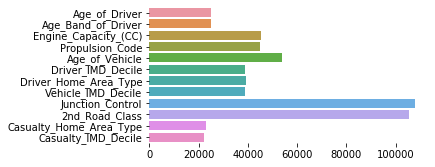

In [19]:
missing = df.isna().sum()
missing = missing[missing > 5000]
sns.set_palette("muted")
plt.figure(figsize=(5,2.5))
ax = sns.barplot(y=missing.index, x=missing)
sns.despine(left=True, bottom=True)



In [20]:
# Drop Driver_IMD_Decile, Vehicle_IMD_Decile
df = df.drop(['Driver_IMD_Decile', 'Vehicle_IMD_Decile'], axis=1)
# Remove Unknown Gender
df = df[df['Sex_of_Driver'] != 3]
# Remove drivers with no age
df = df[df['Age_of_Driver'].notnull()]

# EDA #

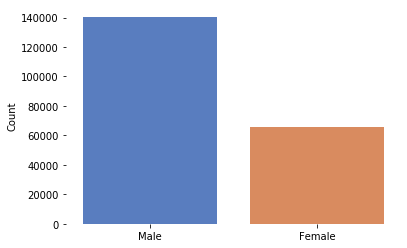

In [21]:
# EDA of Gender
gender = df['Sex_of_Driver'].value_counts().rename({1.0:"Male", 2.0:"Female", 3.0:"Not Known"})
ax = sns.barplot(x=gender.index, y=gender)
ax.set(xlabel='', ylabel='Count')
sns.despine(left=True, bottom=True)
# Conclusion : More than 2x more Males than Females, need to be careful 
# to make training data balanced between genders

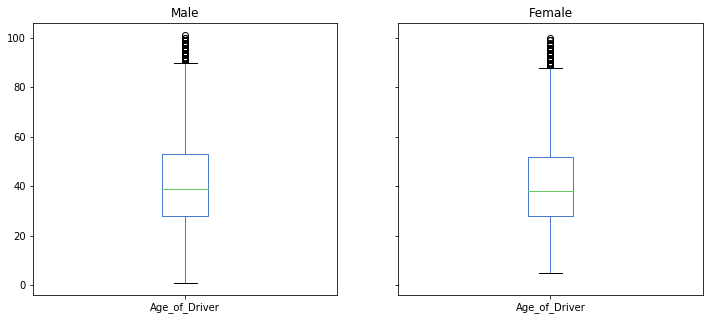

In [22]:
males = df[df['Sex_of_Driver']==1]
females = df[df['Sex_of_Driver']==2]
fig, ax = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)
boxplot = males['Age_of_Driver'].plot(kind='box', ax=ax[0], title='Male')
boxplot = females['Age_of_Driver'].plot(kind='box', ax=ax[1], title='Female')

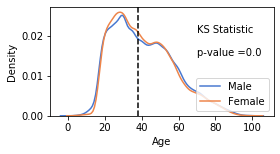

In [23]:
pvalue = stats.ks_2samp(males['Age_of_Driver'], females['Age_of_Driver']).pvalue
# Histogram of Age and Gender
sns.plotting_context(font_scale=2)
fig, ax = plt.subplots()

sns.distplot(males['Age_of_Driver'], label='Male',hist=False, bins=range(1, 110, 10), ax=ax, kde=True)
graph = sns.distplot(females['Age_of_Driver'], label='Female',hist=False, bins=range(1, 110, 10), ax=ax, kde=True)
graph.axvline(38, color='black', linestyle='--')

fig.set_figwidth(4.0)
fig.set_figheight(2.0)

ax.set(xlabel='Age', ylabel='Density')
#ax.set_title("Age of Driver Distribution by Gender")
ax.text(70.0, 0.015, "KS Statistic\n\np-value =" + str(round(pvalue,2)))
ax.legend(["Male", "Female"], loc=4);

plt.show()

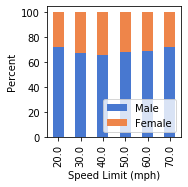

In [24]:
data = df.pivot_table(index='Speed_limit', columns='Sex_of_Driver', values='Road_Type', aggfunc='count')
data = data.dropna()
data = data.div(data.sum(1), axis=0) * 100
ax = data.plot(kind="bar", figsize=(2.4,2.4), stacked=True)
ax.set_xlabel("Speed Limit (mph)")
ax.set_ylabel("Percent")
ax.set_title("")
ax.legend(["Male", "Female"], loc=4);


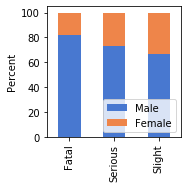

In [25]:
data = df.pivot_table(index='Accident_Severity', columns='Sex_of_Driver', values='Road_Type', aggfunc='count')
data = data.dropna()
data = data.rename(index={1.0:"Fatal", 2.0: "Serious", 3.0: "Slight"})
data = data.div(data.sum(1), axis=0) * 100
ax = data.plot(kind="bar", figsize=(2.4,2.4), stacked=True)
ax.set_xlabel("")
ax.set_ylabel("Percent")
ax.set_title("")
ax.legend(["Male", "Female"], loc=4);

Text(0.5, 1.0, 'Fatal Accidents')

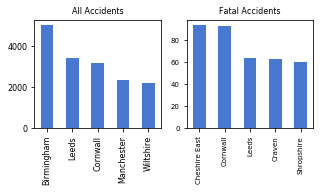

In [26]:
fig, ax = plt.subplots(ncols=2, figsize=(5, 2))
df['LA name'].value_counts().iloc[0:5].plot(kind='bar', ax=ax[0], fontsize=8)
ax[0].set_title("All Accidents", fontsize=8)
df[df['Accident_Severity']==1]['LA name'].value_counts().iloc[0:5].plot(kind='bar', ax=ax[1], fontsize=7)
ax[1].set_title("Fatal Accidents", fontsize=8)


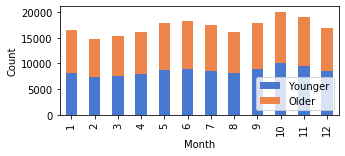

In [27]:
data = df.pivot_table(index='Month', columns='Older_Driver', values='Road_Type', aggfunc='count')
data = data.dropna()
ax = data.plot(kind="bar", figsize=(5,2), stacked=True)
ax.set_xlabel("Month")
ax.set_ylabel("Count")
ax.set_title("")
ax.legend(["Younger", "Older"], loc=4);

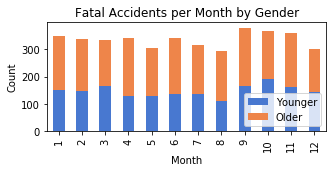

In [28]:
data = df[df['Accident_Severity']==1].pivot_table(index='Month', columns='Older_Driver', values='Road_Type', aggfunc='count')
data = data.dropna()
ax = data.plot(kind="bar", figsize=(5,2), stacked=True)
ax.set_xlabel("Month")
ax.set_ylabel("Count")
ax.set_title("Fatal Accidents per Month by Gender")
ax.legend(["Younger", "Older"], loc=4);

Text(0.5, 1.0, '')

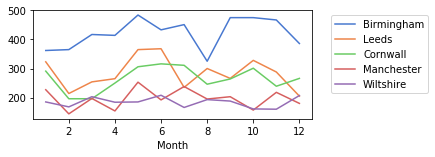

In [29]:
df[df["LA name"]== "Birmingham"].groupby("Month")["Road_Type"].count().plot(figsize=(5,2))
df[df["LA name"]== "Leeds"].groupby("Month")["Road_Type"].count().plot()
df[df["LA name"]== "Cornwall"].groupby("Month")["Road_Type"].count().plot()
df[df["LA name"]== "Manchester"].groupby("Month")["Road_Type"].count().plot()
df[df["LA name"]== "Wiltshire"].groupby("Month")["Road_Type"].count().plot()
plt.legend(["Birmingham", "Leeds", "Cornwall", "Manchester", "Wiltshire"],bbox_to_anchor=(1.05, 1))
plt.title("", loc='center', pad=None)

Text(0.5, 1.0, '')

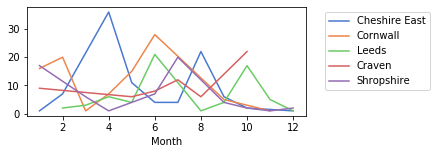

In [30]:
df2 = df[df['Accident_Severity']==1]
df2[df2["LA name"]== "Cheshire East"].groupby("Month")["Road_Type"].count().plot(figsize=(5,2))
df2[df2["LA name"]== "Cornwall"].groupby("Month")["Road_Type"].count().plot()
df2[df2["LA name"]== "Leeds"].groupby("Month")["Road_Type"].count().plot()
df2[df2["LA name"]== "Craven"].groupby("Month")["Road_Type"].count().plot()
df2[df2["LA name"]== "Shropshire"].groupby("Month")["Road_Type"].count().plot()
plt.legend(["Cheshire East", "Cornwall", "Leeds", "Craven", "Shropshire"], bbox_to_anchor=(1.05, 1))
plt.title("", loc='center', pad=None)

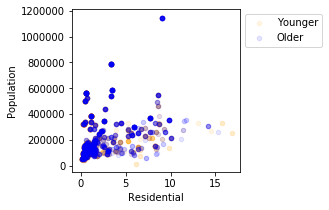

In [31]:
younger = df[df['Older_Driver']==False][df['Accident_Severity']==1]
older = df[df['Older_Driver']==True][df['Accident_Severity']==1]

fig, ax = plt.subplots(ncols=1, figsize=(3,3), sharey=True)
older.plot(kind='scatter', y='Population', x='Residential', c='orange', ax=ax, alpha =0.1)
younger.plot(kind='scatter', y='Population', x='Residential', c='blue', ax=ax, alpha =0.1)
ax.legend(["Younger", "Older"], bbox_to_anchor=(1,1))

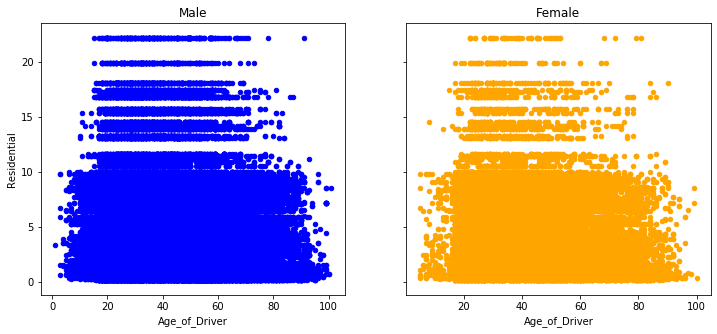

In [32]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)
males.plot(kind='scatter', y='Residential', x='Age_of_Driver', c='blue', ax=ax[0], title="Male")
females.plot(kind='scatter', y='Residential', x='Age_of_Driver', c='orange', ax=ax[1], title="Female")


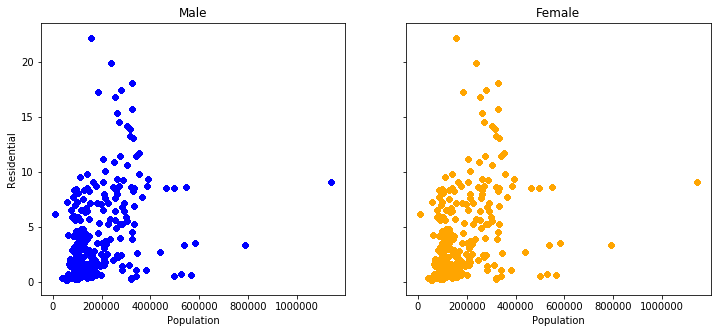

In [33]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)
males.plot(kind='scatter', y='Residential', x='Population', c='blue', ax=ax[0], title="Male")
females.plot(kind='scatter', y='Residential', x='Population', c='orange', ax=ax[1], title="Female")


Light_Conditions,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Darkness - lighting unknown
Older_Driver,,,,
False,44.309927,3.026634,49.273608,3.389831
True,39.521800,5.203938,51.898734,3.375527


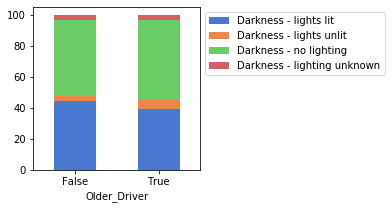

In [34]:
df2 = df[df["Light_Conditions"]!=1][df['Accident_Severity']==1].pivot_table(index="Light_Conditions", columns="Older_Driver", values="Road_Type", aggfunc="count", fill_value=0)
df2 = df2*100/df2.sum()
df2 = df2.rename({1.0: "Daylight", 4.0: "Darkness - lights lit", 5.0: "Darkness - lights unlit", 6.0: "Darkness - no lighting", 7.0: "Darkness - lighting unknown"}, axis=0)
df2 = df2.transpose()
ax = df2.plot(kind="bar", figsize=(3,3), stacked=True)
plt.xticks(rotation='horizontal')
ax.legend(bbox_to_anchor=(1,1))

df2

Speed_limit,20.0,30.0,40.0,50.0,60.0,70.0
Older_Driver,,,,,,
False,1.357466,27.432127,10.803167,9.106335,34.389140,16.911765
True,0.973451,19.557522,9.247788,8.495575,41.725664,20.000000


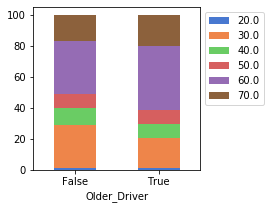

In [35]:
df2 = df[df['Accident_Severity']==1].pivot_table(index="Speed_limit", columns="Older_Driver", values="Light_Conditions", aggfunc="count", fill_value=0)
df2 = df2*100/df2.sum()
df2 = df2.transpose()
ax = df2.plot(kind="bar", figsize=(3,3), stacked=True)
plt.xticks(rotation='horizontal')
ax.legend(bbox_to_anchor=(1,1))

df2

In [36]:
# TODO : Time and Daytime etc, Road_Surface_Conditions etc
df = df[df.Towing_and_Articulation.notnull()]
df = df[df.Vehicle_Manoeuvre.notnull()]
df = df[df.Skidding_and_Overturning.notnull()]
df = df[df.Journey_Purpose_of_Driver.notnull()]
df = df[df.Casualty_Type.notnull()]
df = df[df.Sex_of_Casualty.notnull()]
df = df[df.Road_Surface_Conditions.notnull()]
df = df[df['GDP Growth'].notnull()]
df = df[df.Age_of_Casualty.notnull()]
df = df[df.Vehicle_Type.notnull()]
df = df[df.Hour.notnull()]

print("Number of datapoints after removal of missing data = ", df.shape[0])


Number of datapoints after removal of missing data =  198414


# Pipeline #

In [37]:
# z-scale for quantative data
def z_scale(x):
    return (x-x.mean())/x.std()
def nop(x):
    return x

# TODO : Binary : Is Weekend?

# column transformer
column_transformer = ColumnTransformer(
    transformers = [ 
    ('Towing_and_Articulation', OneHotEncoder(categories='auto'), ["Towing_and_Articulation"]),
    ('Vehicle_Type', OneHotEncoder(categories='auto'), ["Vehicle_Type"]),
    ('Vehicle_Manoeuvre', OneHotEncoder(categories='auto'), ["Vehicle_Manoeuvre"]),
    ('Skidding_and_Overturning', OneHotEncoder(categories='auto'), ["Skidding_and_Overturning"]),
    ('Journey_Purpose_of_Driver', OneHotEncoder(categories='auto'), ["Journey_Purpose_of_Driver"]),
    ('LA name', OneHotEncoder(categories='auto'), ["LA name"]),
    ('Hour', OneHotEncoder(categories='auto'), ["Hour"]),
    ('Road_Type', OneHotEncoder(categories='auto'), ["Road_Type"]),
    ('Month', OrdinalEncoder(), ["Month"]),
    ('Sex_of_Casualty', OneHotEncoder(categories='auto'), ["Sex_of_Casualty"]),
    ('Sex_of_Driver', OneHotEncoder(categories='auto'), ["Sex_of_Driver"]),
    ('Number_of_Casualties', MinMaxScaler(), ["Number_of_Casualties"]),
    ('Weather_Conditions', OneHotEncoder(categories='auto'), ["Weather_Conditions"]),
    ('Road_Surface_Conditions', OneHotEncoder(categories='auto'), ["Road_Surface_Conditions"]),
    ('Light_Conditions', OneHotEncoder(categories='auto'), ["Light_Conditions"]),
    ('Urban_or_Rural_Area', OneHotEncoder(categories='auto'), ["Urban_or_Rural_Area"]),
    ('Population', MinMaxScaler(), ["Population"]),
    ('GDP', FunctionTransformer(func=z_scale, validate=False), ["GDP"]),
    ('GDP Growth', FunctionTransformer(func=nop, validate=False), ["GDP Growth"]),
    ('Age_of_Casualty', FunctionTransformer(func=nop, validate=False), ["Age_of_Casualty"]),
    ('Agriculture', MinMaxScaler(), ["Agriculture"]),
    ('Residential', MinMaxScaler(), ["Residential"]),
    #('Age_of_Driver', FunctionTransformer(func=nop, validate=False), ["Age_of_Driver"]),
    ],
    remainder = 'drop')

def show_confusion_result(title, x, y):
    start = time.time()
    y_pred = pipeline.predict(x)
    end = time.time()
    # create confusion matrix
    cf_matrix = confusion_matrix(y_true=y, y_pred=y_pred)
    TN, FP, FN, TP = cf_matrix.ravel()
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    F1 = 2*(precision*recall)/(precision+recall)
    accuracy = (TP+TN)/(TN + FP + FN + TP)
    # Work Cited: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    fig, ax = plt.subplots()
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)
    ax.set_ylim([0,2])
    ax.text(2.7, 1.4, 'Accuracy  ' + str(round(accuracy*100,2)) + '%', c='blue')
    ax.text(2.7, 1.2, 'Precision  ' + str(round(precision*100,2)) + '%', c='blue')
    ax.text(2.7, 1.0, 'Recall       ' + str(round(recall*100,2)) + '%', c='blue' )
    ax.text(2.7, 0.8, 'F1             ' + str(round(F1*100,2)) + '%', c='blue' )
    x =plt.title(title)
    return [accuracy, precision, recall, F1, end-start]


def make_summary_table(result):
    results_summary = (pd.DataFrame(np.array(result), columns=['Accuracy %', 'Precision %', 'Recall %', 'F1 %', 'Prediction Time (s)'])*100.0).round(2)
    results_summary['Settings'] = ['Default', 'Default', 'Default', 'Optimized', 'Optimized', 'Optimized']
    results_summary['Data'] = ['Train', 'Validate', 'Test', 'Train', 'Validate', 'Test']
    results_summary = results_summary[['Settings', 'Data', 'Accuracy %', 'Precision %', 'Recall %', 'F1 %', 'Prediction Time (s)']]
    return results_summary

fit_time = []
models = {}

## Train (60), Validate (20), Test (20) Split ##

In [38]:
label = 'Older_Driver'
# split it into training, validation, and test splits, with a 60/20/20% 
x_train_validate, x_test, y_train_validate, y_test = train_test_split(df.drop(label, axis=1), df[label], test_size=0.2, random_state=42)
# now split train_validate into train (75%) and validate (25%)
x_train, x_validate, y_train, y_validate = train_test_split(x_train_validate, y_train_validate, test_size=0.25, random_state=42)
# set number of folds for validation:
nfolds = 5

## Decision Tree Classifier (default) ##

In [39]:
decisiontree = DecisionTreeClassifier()
pipeline = Pipeline([
    ('preprocessing', column_transformer), 
    ('decisiontree', decisiontree)
], verbose=verbose)

In [40]:
# Train 
pipeline.fit(x_train, y_train)
# Accuracy
train_score = accuracy_score(y_train, pipeline.predict(x_train), normalize=True, sample_weight=None)
test_score = accuracy_score(y_test, pipeline.predict(x_test), normalize=True, sample_weight=None)
train_score, test_score

(0.9834352530071904, 0.6801149106670362)

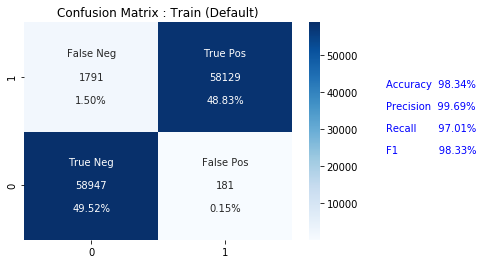

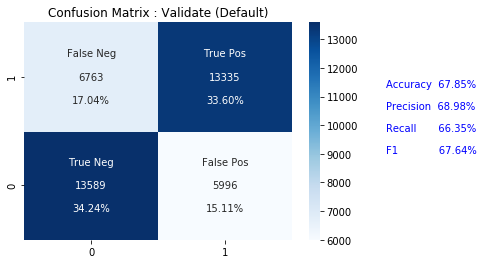

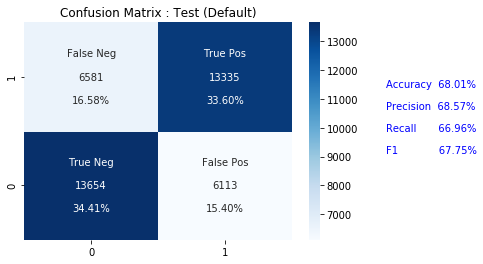

In [41]:
result = []
result.append(show_confusion_result('Confusion Matrix : Train (Default)', x_train, y_train))
result.append(show_confusion_result('Confusion Matrix : Validate (Default)', x_validate, y_validate))
result.append(show_confusion_result('Confusion Matrix : Test (Default)', x_test, y_test))

## Decision Tree Classifier Hyper-Parameter Tuning ##

In [42]:
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [6,10,20]
parameters = dict(decisiontree__criterion=criterion,
                  decisiontree__max_depth=max_depth,
                  decisiontree__splitter = splitter)
clf = GridSearchCV(pipeline, parameters, cv=nfolds)
# Fit the grid search
clf.fit(x_validate, y_validate)
print('Best criterion:', clf.best_estimator_.get_params()['decisiontree__criterion'])
print('Best max_depth:', clf.best_estimator_.get_params()['decisiontree__max_depth'])
print('Best splitter:', clf.best_estimator_.get_params()['decisiontree__splitter'])

Best criterion: gini
Best max_depth: 6
Best splitter: best


In [43]:
decisiontree = clf.best_estimator_.get_params()['decisiontree']
pipeline = Pipeline([
    ('preprocessing', column_transformer), 
    ('decisiontree', decisiontree)
], verbose=verbose)
# Train 
start = time.time(); 
pipeline.fit(x_train, y_train); 
fit_time.append(time.time()-start);
models["decisiontree"] = pipeline

# Accuracy
train_score = accuracy_score(y_train, pipeline.predict(x_train), normalize=True, sample_weight=None)
print("Training Data Accuracy =", train_score, " Test Data Accuracy =", test_score)

Training Data Accuracy = 0.7201968953699348  Test Data Accuracy = 0.6801149106670362


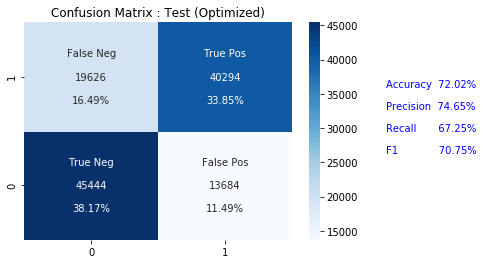

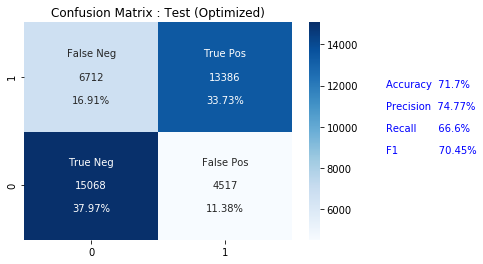

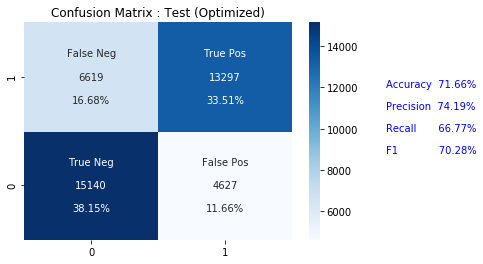

In [44]:
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_train, y_train))
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_validate, y_validate))
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_test, y_test))

## Decision Tree Final Results ##

In [45]:
decisiontree_df = make_summary_table(result)
decisiontree_df

,Settings,Data,Accuracy %,Precision %,Recall %,F1 %,Prediction Time (s)
0,Default,Train,98.34,99.69,97.01,98.33,40.36
1,Default,Validate,67.85,68.98,66.35,67.64,17.78
2,Default,Test,68.01,68.57,66.96,67.75,16.18
3,Optimized,Train,72.02,74.65,67.25,70.75,38.96
4,Optimized,Validate,71.70,74.77,66.60,70.45,16.48
5,Optimized,Test,71.66,74.19,66.77,70.28,17.19


## Random Forest Classifier (default) ##

In [46]:
randomforest = RandomForestClassifier(n_estimators=5,max_depth=5)
pipeline = Pipeline([
    ('preprocessing', column_transformer), 
    ('randomforest', randomforest)
], verbose=verbose)

In [47]:
# Train 
pipeline.fit(x_train, y_train)
# Accuracy
train_score = accuracy_score(y_train, pipeline.predict(x_train), normalize=True, sample_weight=None)
test_score = accuracy_score(y_test, pipeline.predict(x_test), normalize=True, sample_weight=None)
train_score, test_score

(0.6429843424501042, 0.6431721392031853)

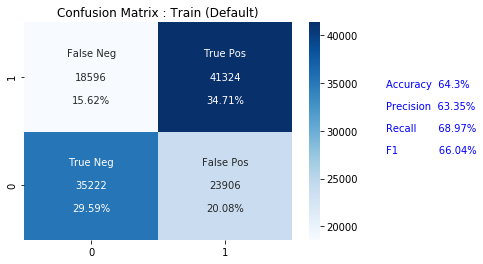

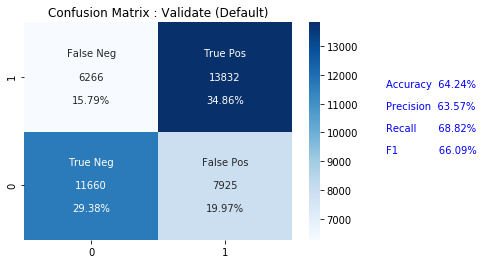

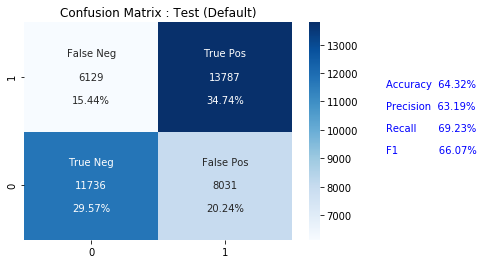

In [48]:
result = []
result.append(show_confusion_result('Confusion Matrix : Train (Default)', x_train, y_train))
result.append(show_confusion_result('Confusion Matrix : Validate (Default)', x_validate, y_validate))
result.append(show_confusion_result('Confusion Matrix : Test (Default)', x_test, y_test))

## Random Forest Classifier Hyper-Parameter Tuning ##

In [49]:
n_estimators = [5,20]
max_depth = [5,30]
criterion = ['entropy','gini']

parameters = dict(randomforest__n_estimators=n_estimators,
                  randomforest__max_depth=max_depth,
                 randomforest__criterion = criterion)
clf = GridSearchCV(pipeline, parameters, cv=nfolds)
# Fit the grid search
clf.fit(x_validate, y_validate)
print('Best n_estimators:', clf.best_estimator_.get_params()['randomforest__n_estimators'])
print('Best max_depth:', clf.best_estimator_.get_params()['randomforest__max_depth'])
print('Best criterion:', clf.best_estimator_.get_params()['randomforest__criterion'])

Best n_estimators: 20
Best max_depth: 30
Best criterion: entropy


In [50]:
randomforest = clf.best_estimator_.get_params()['randomforest']
pipeline = Pipeline([
    ('preprocessing', column_transformer), 
    ('randomforest', randomforest)
], verbose=verbose)
# Train 
start = time.time(); 
pipeline.fit(x_train, y_train); 
fit_time.append(time.time()-start);
models["randomforest"] = pipeline

# Accuracy
test_score = accuracy_score(y_test, pipeline.predict(x_test), normalize=True, sample_weight=None)
test_score = accuracy_score(y_test, pipeline.predict(x_test), normalize=True, sample_weight=None)
print("Training Data Accuracy =", train_score, " Test Data Accuracy =", test_score)

Training Data Accuracy = 0.6429843424501042  Test Data Accuracy = 0.7466421389511881


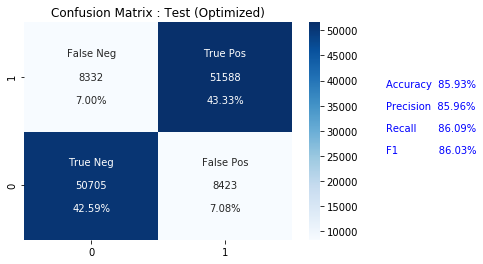

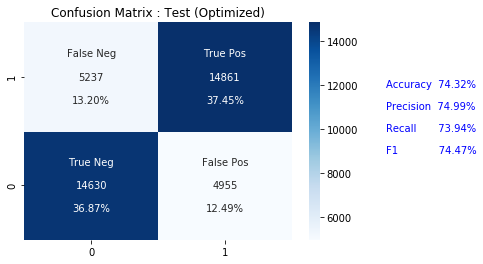

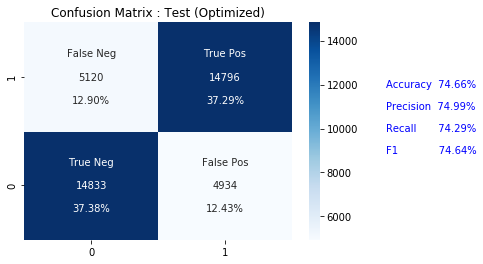

In [51]:
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_train, y_train))
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_validate, y_validate))
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_test, y_test))

## Random Forest Final Results ##

In [52]:
randomforest_df = make_summary_table(result)
randomforest_df

,Settings,Data,Accuracy %,Precision %,Recall %,F1 %,Prediction Time (s)
0,Default,Train,64.30,63.35,68.97,66.04,37.22
1,Default,Validate,64.24,63.57,68.82,66.09,12.50
2,Default,Test,64.32,63.19,69.23,66.07,17.20
3,Optimized,Train,85.93,85.96,86.09,86.03,93.70
4,Optimized,Validate,74.32,74.99,73.94,74.47,35.77
5,Optimized,Test,74.66,74.99,74.29,74.64,32.27


## SVC Classifier (default) ##

In [53]:
svc = SVC(gamma='auto', max_iter=10)
pipeline = Pipeline([
    ('preprocessing', column_transformer), 
    ('svc', svc)
],
verbose=verbose)

In [54]:
# Train 
pipeline.fit(x_train, y_train)
# Accuracy
train_score = accuracy_score(y_train, pipeline.predict(x_train), normalize=True, sample_weight=None)
test_score = accuracy_score(y_test, pipeline.predict(x_test), normalize=True, sample_weight=None)
train_score, test_score

(0.6215476110476447, 0.6206436005342338)

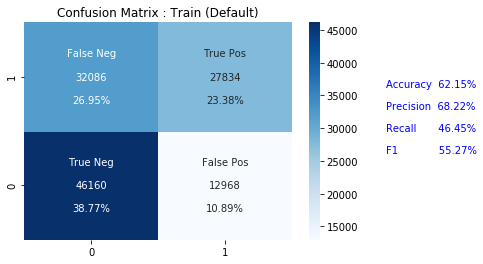

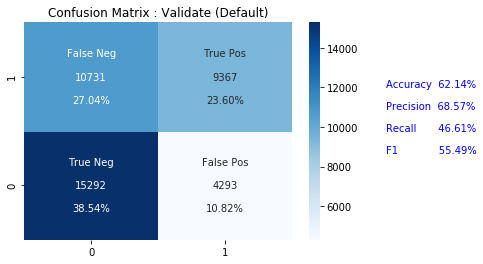

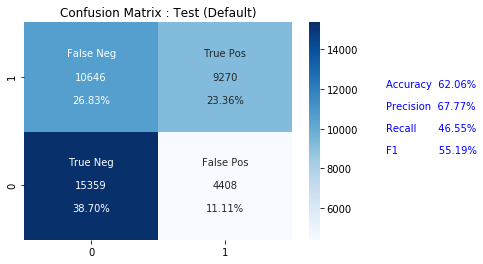

In [55]:
result = []
result.append(show_confusion_result('Confusion Matrix : Train (Default)', x_train, y_train))
result.append(show_confusion_result('Confusion Matrix : Validate (Default)', x_validate, y_validate))
result.append(show_confusion_result('Confusion Matrix : Test (Default)', x_test, y_test))

## SVC Classifier Results Hyper-Parameter Tuning ##

In [56]:
C = [(10 ** i) for i in range(-1,5)]

parameters = dict(svc__C=C)
clf = GridSearchCV(pipeline, parameters, cv=nfolds)
# Fit the grid search
clf.fit(x_validate, y_validate)
print('Best C:', clf.best_estimator_.get_params()['svc__C'])

Best C: 0.1


In [57]:
svc = clf.best_estimator_.get_params()['svc']
pipeline = Pipeline([
    ('preprocessing', column_transformer), 
    ('svc', svc)
])
# Train 
start = time.time(); 
pipeline.fit(x_train, y_train); 
fit_time.append(time.time()-start);
models["svc"] = pipeline

# Accuracy
train_score = accuracy_score(y_train, pipeline.predict(x_train), normalize=True, sample_weight=None)
test_score = accuracy_score(y_test, pipeline.predict(x_test), normalize=True, sample_weight=None)
print("Training Data Accuracy =", train_score, " Test Data Accuracy =", test_score)

Training Data Accuracy = 0.6215476110476447  Test Data Accuracy = 0.6206436005342338


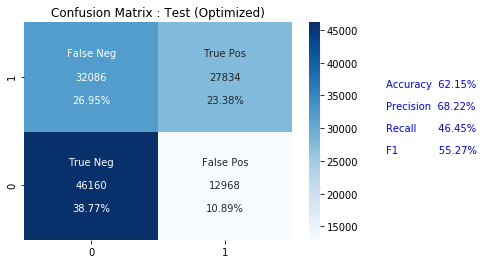

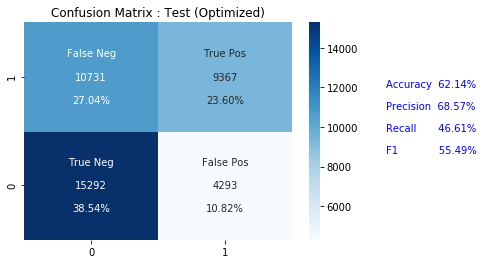

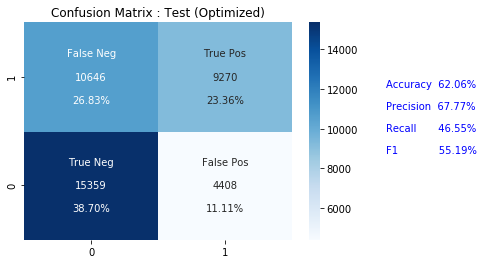

In [58]:
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_train, y_train))
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_validate, y_validate))
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_test, y_test))

## SVC Final Results ##

In [59]:
svc_df = make_summary_table(result)
svc_df

,Settings,Data,Accuracy %,Precision %,Recall %,F1 %,Prediction Time (s)
0,Default,Train,62.15,68.22,46.45,55.27,67.83
1,Default,Validate,62.14,68.57,46.61,55.49,22.48
2,Default,Test,62.06,67.77,46.55,55.19,21.98
3,Optimized,Train,62.15,68.22,46.45,55.27,65.54
4,Optimized,Validate,62.14,68.57,46.61,55.49,22.47
5,Optimized,Test,62.06,67.77,46.55,55.19,24.18


## Gradient Boost Classifier (default) ##

In [60]:
gboost = GradientBoostingClassifier()
pipeline = Pipeline([
    ('preprocessing', column_transformer), 
    ('gboost', gboost)
], verbose=verbose)

In [61]:
# Train 
pipeline.fit(x_train, y_train)
# Accuracy
train_score = accuracy_score(y_train, pipeline.predict(x_train), normalize=True, sample_weight=None)
test_score = accuracy_score(y_test, pipeline.predict(x_test), normalize=True, sample_weight=None)
train_score, test_score

(0.7292268664740272, 0.725096388881889)

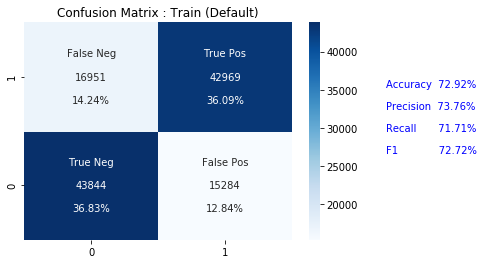

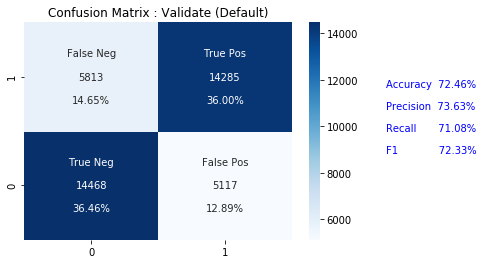

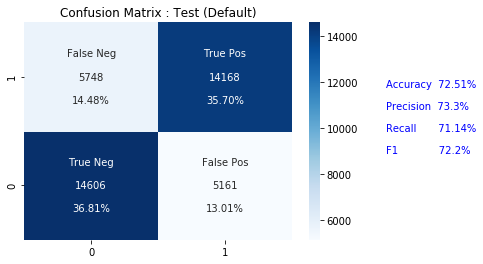

In [62]:
result = []
result.append(show_confusion_result('Confusion Matrix : Train (Default)', x_train, y_train))
result.append(show_confusion_result('Confusion Matrix : Validate (Default)', x_validate, y_validate))
result.append(show_confusion_result('Confusion Matrix : Test (Default)', x_test, y_test))

## Gradient Boost Hyper-Parameter Tuning ##

In [63]:
loss = ['deviance', 'exponential']
n_estimators = [50,100,200]

parameters = dict(gboost__n_estimators=n_estimators,
                  gboost__loss = loss)
clf = GridSearchCV(pipeline, parameters, cv=nfolds)
# Fit the grid search
clf.fit(x_validate, y_validate)
print('Best n_estimators:', clf.best_estimator_.get_params()['gboost__n_estimators'])
print('Best loss:', clf.best_estimator_.get_params()['gboost__loss'])

Best n_estimators: 200
Best loss: deviance


In [64]:
gboost = clf.best_estimator_.get_params()['gboost']
pipeline = Pipeline([
    ('preprocessing', column_transformer), 
    ('gboost', gboost)
], verbose=verbose)
# Train 
start = time.time(); 
pipeline.fit(x_train, y_train); 
fit_time.append(time.time()-start);
models["gboost"] = pipeline

# Accuracy
train_score = accuracy_score(y_train, pipeline.predict(x_train), normalize=True, sample_weight=None)
test_score = accuracy_score(y_test, pipeline.predict(x_test), normalize=True, sample_weight=None)
print("Training Data Accuracy =", train_score, " Test Data Accuracy =", test_score)

Training Data Accuracy = 0.7314276594314898  Test Data Accuracy = 0.7269107678350931


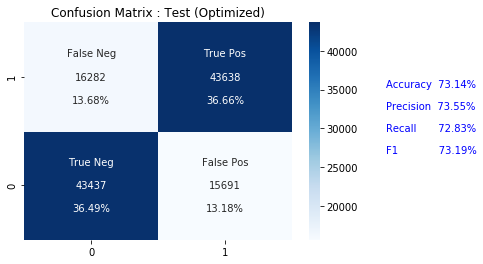

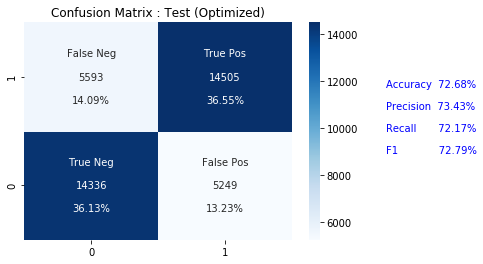

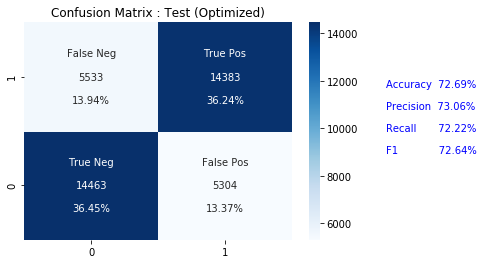

In [65]:
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_train, y_train))
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_validate, y_validate))
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_test, y_test))

## Gradient Boost Final Results ##

In [66]:
gboost_df = make_summary_table(result)
gboost_df

,Settings,Data,Accuracy %,Precision %,Recall %,F1 %,Prediction Time (s)
0,Default,Train,72.92,73.76,71.71,72.72,61.96
1,Default,Validate,72.46,73.63,71.08,72.33,22.88
2,Default,Test,72.51,73.30,71.14,72.20,23.90
3,Optimized,Train,73.14,73.55,72.83,73.19,86.11
4,Optimized,Validate,72.68,73.43,72.17,72.79,31.47
5,Optimized,Test,72.69,73.06,72.22,72.64,32.37


## Bagging Classifier (default) ##

In [67]:
bagging = BaggingClassifier()
pipeline = Pipeline([
    ('preprocessing', column_transformer), 
    ('bagging', bagging)
], verbose=verbose)

In [68]:
# Train 
pipeline.fit(x_train, y_train)
# Accuracy
train_score = accuracy_score(y_train, pipeline.predict(x_train), normalize=True, sample_weight=None)
test_score = accuracy_score(y_test, pipeline.predict(x_test), normalize=True, sample_weight=None)
train_score, test_score

(0.96973489684833, 0.7161756923619687)

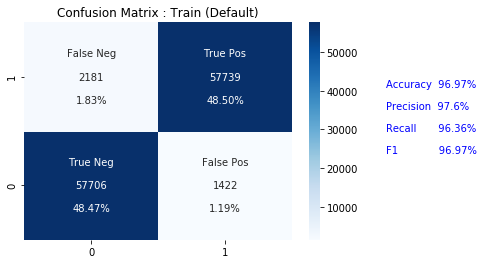

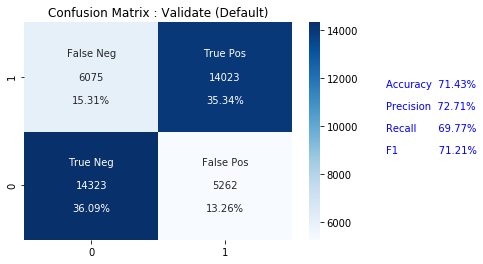

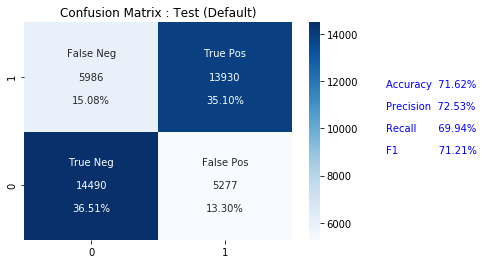

In [69]:
result = []
result.append(show_confusion_result('Confusion Matrix : Train (Default)', x_train, y_train))
result.append(show_confusion_result('Confusion Matrix : Validate (Default)', x_validate, y_validate))
result.append(show_confusion_result('Confusion Matrix : Test (Default)', x_test, y_test))

## Bagging Classifier Hyper-Parameter Tuning ##

In [70]:
max_samples = [0.5, 1.0, 1.5]
max_features = [0.5, 1.0, 1.5]
parameters = dict(bagging__max_features = max_features,
                 bagging__max_samples = max_samples)
clf = GridSearchCV(pipeline, parameters, cv=nfolds)
# Fit the grid search
clf.fit(x_validate, y_validate)
print('Best max_features:', clf.best_estimator_.get_params()['bagging__max_features'])
print('Best _max_samples:', clf.best_estimator_.get_params()['bagging__max_samples'])

Best max_features: 1.0
Best _max_samples: 0.5


In [71]:
bagging = clf.best_estimator_.get_params()['bagging']
pipeline = Pipeline([
    ('preprocessing', column_transformer), 
    ('bagging', bagging)
], verbose=verbose)
# Train 
start = time.time(); 
pipeline.fit(x_train, y_train); 
fit_time.append(time.time()-start);
models["bagging"] = pipeline

# Accuracy
train_score = accuracy_score(y_train, pipeline.predict(x_train), normalize=True, sample_weight=None)
test_score = accuracy_score(y_test, pipeline.predict(x_test), normalize=True, sample_weight=None)
print("Training Data Accuracy =", train_score, " Test Data Accuracy =", test_score)

Training Data Accuracy = 0.9090282911094685  Test Data Accuracy = 0.716906483884787


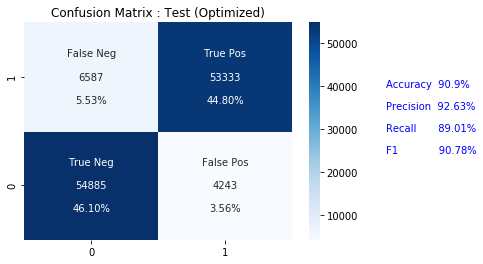

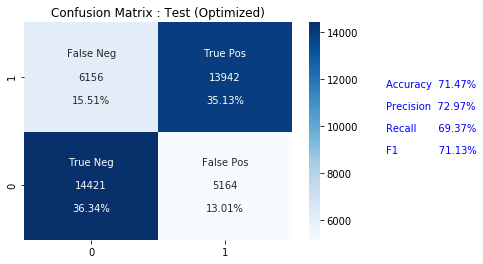

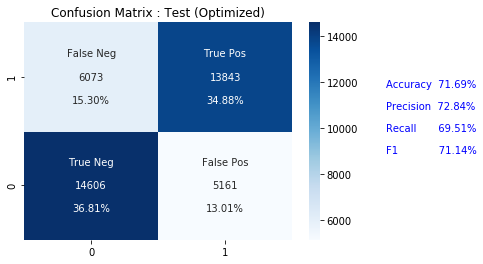

In [72]:
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_train, y_train))
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_validate, y_validate))
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_test, y_test))

## Bagging Final Results ##

In [73]:
bagging_df = make_summary_table(result)
bagging_df

,Settings,Data,Accuracy %,Precision %,Recall %,F1 %,Prediction Time (s)
0,Default,Train,96.97,97.60,96.36,96.97,100.00
1,Default,Validate,71.43,72.71,69.77,71.21,38.06
2,Default,Test,71.62,72.53,69.94,71.21,41.06
3,Optimized,Train,90.90,92.63,89.01,90.78,103.42
4,Optimized,Validate,71.47,72.97,69.37,71.13,37.29
5,Optimized,Test,71.69,72.84,69.51,71.14,38.46


## Naive Bayes (default) ##

In [74]:
nbayes = BernoulliNB()
pipeline = Pipeline([
    ('preprocessing', column_transformer), 
    ('nbayes', nbayes)
], verbose=verbose)

In [75]:
# Train 
pipeline.fit(x_train, y_train)
# Accuracy
train_score = accuracy_score(y_train, pipeline.predict(x_train), normalize=True, sample_weight=None)
test_score = accuracy_score(y_test, pipeline.predict(x_test), normalize=True, sample_weight=None)
train_score, test_score

(0.5884517169545057, 0.5843056220547842)

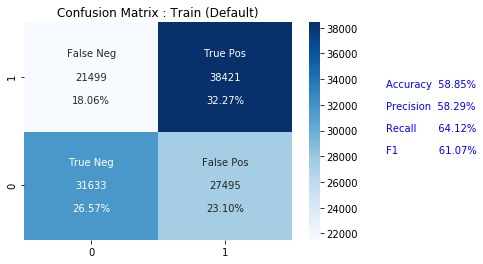

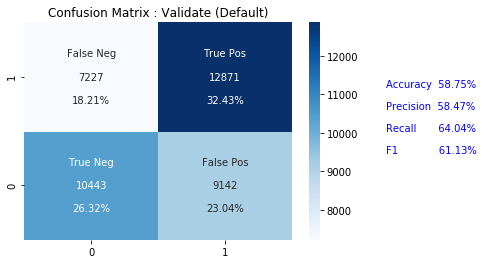

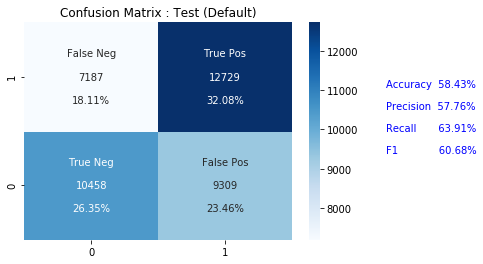

In [76]:
result = []
result.append(show_confusion_result('Confusion Matrix : Train (Default)', x_train, y_train))
result.append(show_confusion_result('Confusion Matrix : Validate (Default)', x_validate, y_validate))
result.append(show_confusion_result('Confusion Matrix : Test (Default)', x_test, y_test))

## Naive Bayes Hyper-Parameter Tuning ##

In [77]:
alpha = [0.5, 1.0, 1.5]
binarize = [0.5, 1.0, 1.5]
parameters = dict(nbayes__alpha = alpha,
                 nbayes__binarize = binarize)
clf = GridSearchCV(pipeline, parameters, cv=nfolds)
# Fit the grid search
clf.fit(x_validate, y_validate)
print('Best alpha:', clf.best_estimator_.get_params()['nbayes__alpha'])
print('Best binarize:', clf.best_estimator_.get_params()['nbayes__binarize'])

Best alpha: 1.0
Best binarize: 0.5


In [78]:
nbayes = clf.best_estimator_.get_params()['nbayes']
pipeline = Pipeline([
    ('preprocessing', column_transformer), 
    ('nbayes', nbayes)
], verbose=verbose)
# Train 
start = time.time(); 
pipeline.fit(x_train, y_train); 
fit_time.append(time.time()-start);
models["nbayes"] = pipeline

# Accuracy
train_score = accuracy_score(y_train, pipeline.predict(x_train), normalize=True, sample_weight=None)
test_score = accuracy_score(y_test, pipeline.predict(x_test), normalize=True, sample_weight=None)
print("Training Data Accuracy =", train_score, " Test Data Accuracy =", test_score)

Training Data Accuracy = 0.5885189167394664  Test Data Accuracy = 0.5841796235163672


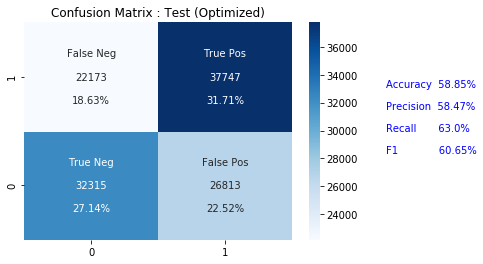

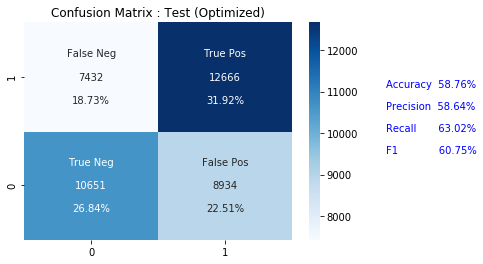

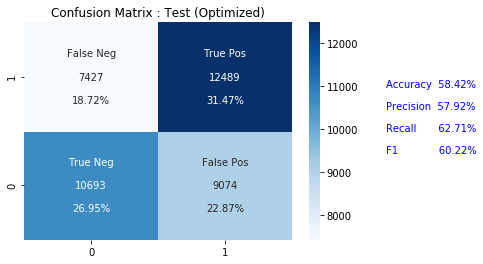

In [79]:
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_train, y_train))
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_validate, y_validate))
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_test, y_test))

## Naive Bayes Final Results ##

In [80]:
nbayes_df = make_summary_table(result)
nbayes_df

,Settings,Data,Accuracy %,Precision %,Recall %,F1 %,Prediction Time (s)
0,Default,Train,58.85,58.29,64.12,61.07,41.06
1,Default,Validate,58.75,58.47,64.04,61.13,15.28
2,Default,Test,58.43,57.76,63.91,60.68,15.18
3,Optimized,Train,58.85,58.47,63.00,60.65,43.06
4,Optimized,Validate,58.76,58.64,63.02,60.75,15.08
5,Optimized,Test,58.42,57.92,62.71,60.22,13.69


## Nearest Centroid (default) ##

In [81]:
ncentroid = NearestCentroid()
pipeline = Pipeline([
    ('preprocessing', column_transformer), 
    ('ncentroid', ncentroid)
], verbose=verbose)

In [82]:
# Train 
pipeline.fit(x_train, y_train)
# Accuracy
train_score = accuracy_score(y_train, pipeline.predict(x_train), normalize=True, sample_weight=None)
test_score = accuracy_score(y_test, pipeline.predict(x_test), normalize=True, sample_weight=None)
train_score, test_score

(0.7181473019286339, 0.7151425043469496)

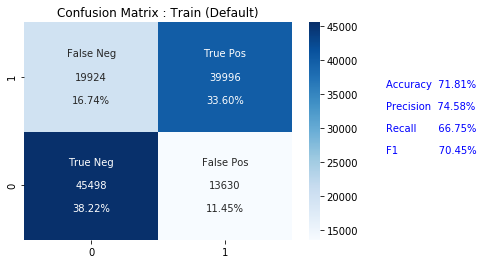

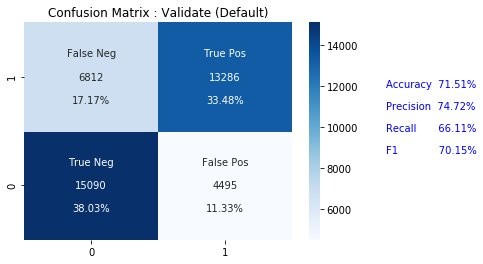

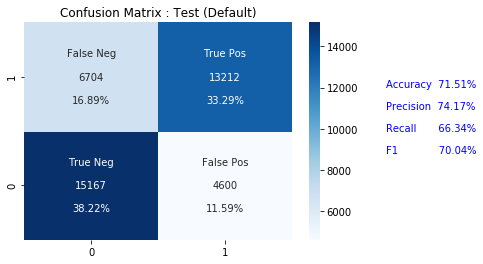

In [83]:
result = []
result.append(show_confusion_result('Confusion Matrix : Train (Default)', x_train, y_train))
result.append(show_confusion_result('Confusion Matrix : Validate (Default)', x_validate, y_validate))
result.append(show_confusion_result('Confusion Matrix : Test (Default)', x_test, y_test))

## Nearest Centroid Hyper-Parameter Tuning ##

In [84]:
metric = ['euclidean', 'manhattan']
parameters = dict(ncentroid__metric = metric)
clf = GridSearchCV(pipeline, parameters, cv=nfolds)
# Fit the grid search
clf.fit(x_validate, y_validate)
print('Best metric:', clf.best_estimator_.get_params()['ncentroid__metric'])

Best metric: euclidean


In [85]:
ncentroid = clf.best_estimator_.get_params()['ncentroid']
pipeline = Pipeline([
    ('preprocessing', column_transformer), 
    ('ncentroid', ncentroid)
], verbose=verbose)
# Train 
start = time.time(); 
pipeline.fit(x_train, y_train); 
fit_time.append(time.time()-start);
models["ncentroid"] = pipeline

# Accuracy
train_score = accuracy_score(y_train, pipeline.predict(x_train), normalize=True, sample_weight=None)
test_score = accuracy_score(y_test, pipeline.predict(x_test), normalize=True, sample_weight=None)
print("Training Data Accuracy =", train_score, " Test Data Accuracy =", test_score)

Training Data Accuracy = 0.7181473019286339  Test Data Accuracy = 0.7151425043469496


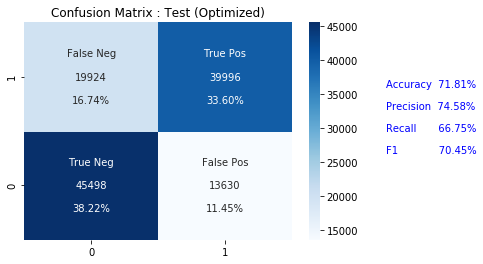

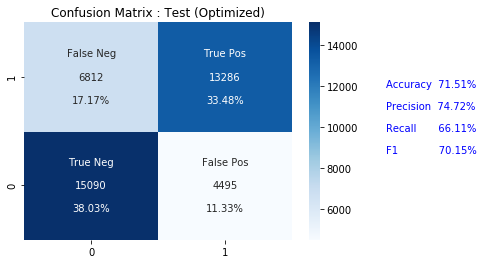

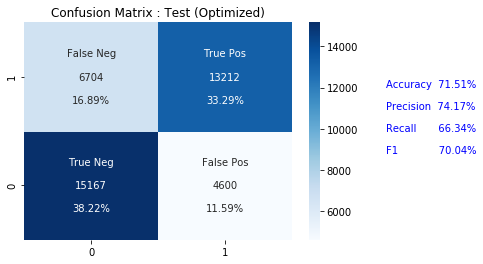

In [86]:
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_train, y_train))
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_validate, y_validate))
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_test, y_test))

## Nearest Centroid Final Results ##

In [87]:
ncentroid_df = make_summary_table(result)
ncentroid_df

,Settings,Data,Accuracy %,Precision %,Recall %,F1 %,Prediction Time (s)
0,Default,Train,71.81,74.58,66.75,70.45,37.76
1,Default,Validate,71.51,74.72,66.11,70.15,14.28
2,Default,Test,71.51,74.17,66.34,70.04,14.19
3,Optimized,Train,71.81,74.58,66.75,70.45,38.06
4,Optimized,Validate,71.51,74.72,66.11,70.15,15.08
5,Optimized,Test,71.51,74.17,66.34,70.04,14.78


## Multi Layer Perceptron (default) ##

In [88]:
mlp = MLPClassifier()
pipeline = Pipeline([
    ('preprocessing', column_transformer), 
    ('mlp', mlp)
], verbose=verbose)

In [89]:
# Train 
pipeline.fit(x_train, y_train)
# Accuracy
train_score = accuracy_score(y_train, pipeline.predict(x_train), normalize=True, sample_weight=None)
test_score = accuracy_score(y_test, pipeline.predict(x_test), normalize=True, sample_weight=None)
train_score, test_score

(0.8659868288421477, 0.7017362598593856)

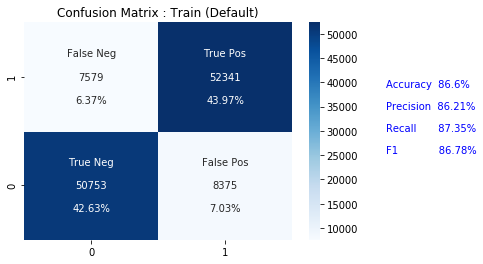

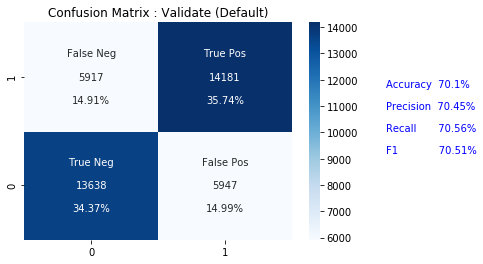

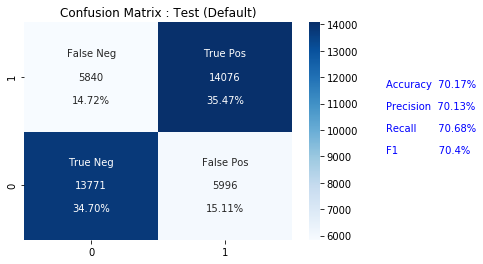

In [90]:
result = []
result.append(show_confusion_result('Confusion Matrix : Train (Default)', x_train, y_train))
result.append(show_confusion_result('Confusion Matrix : Validate (Default)', x_validate, y_validate))
result.append(show_confusion_result('Confusion Matrix : Test (Default)', x_test, y_test))

## Multi Layer Perceptron Hyper-Parameter Tuning ##

In [91]:
nfolds = 2 # too slow for too many folds
activation = ['logistic', 'tanh', 'relu']
solver = ['lbfgs', 'adam']

parameters = dict(mlp__activation = activation,
                 mlp__solver = solver)
clf = GridSearchCV(pipeline, parameters, cv=nfolds)
# Fit the grid search
clf.fit(x_validate, y_validate)
print('Best activation:', clf.best_estimator_.get_params()['mlp__activation'])
print('Best solver:', clf.best_estimator_.get_params()['mlp__solver'])

Best activation: logistic
Best solver: lbfgs


In [92]:
mlp = clf.best_estimator_.get_params()['mlp']
pipeline = Pipeline([
    ('preprocessing', column_transformer), 
    ('mlp', mlp)
], verbose=verbose)
# Train 
start = time.time(); 
pipeline.fit(x_train, y_train); 
fit_time.append(time.time()-start);
models["mlp"] = pipeline

# Accuracy
train_score = accuracy_score(y_train, pipeline.predict(x_train), normalize=True, sample_weight=None)
test_score = accuracy_score(y_test, pipeline.predict(x_test), normalize=True, sample_weight=None)
print("Training Data Accuracy =", train_score, " Test Data Accuracy =", test_score)

Training Data Accuracy = 0.7169629057187017  Test Data Accuracy = 0.7132525262706952


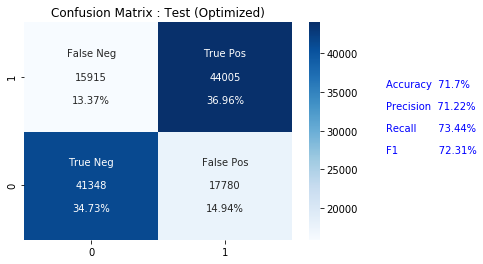

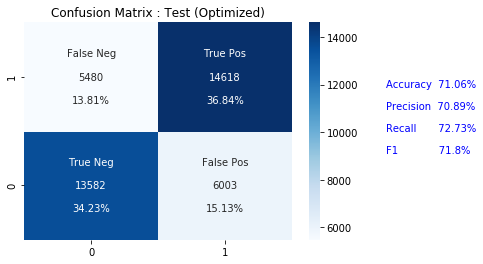

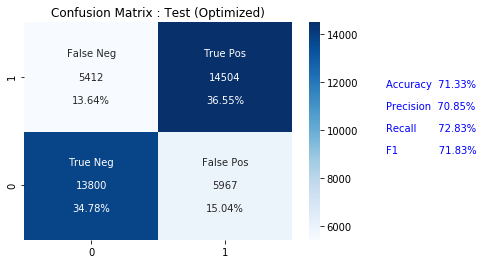

In [93]:
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_train, y_train))
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_validate, y_validate))
result.append(show_confusion_result('Confusion Matrix : Test (Optimized)', x_test, y_test))

## Multi Layer Perceptron Final Results ##

In [94]:
mlp_df = make_summary_table(result)
mlp_df

,Settings,Data,Accuracy %,Precision %,Recall %,F1 %,Prediction Time (s)
0,Default,Train,86.60,86.21,87.35,86.78,159.03
1,Default,Validate,70.10,70.45,70.56,70.51,51.75
2,Default,Test,70.17,70.13,70.68,70.40,55.25
3,Optimized,Train,71.70,71.22,73.44,72.31,53.06
4,Optimized,Validate,71.06,70.89,72.73,71.80,17.98
5,Optimized,Test,71.33,70.85,72.83,71.83,17.78


# Model Final Results #

In [95]:
summary_df = decisiontree_df.assign(Model="Decision Tree").assign(Fit_Time=fit_time[0])
summary_df = summary_df.append(randomforest_df.assign(Model="Random Forest").assign(Fit_Time=fit_time[1]))
summary_df = summary_df.append(svc_df.assign(Model="SVC").assign(Fit_Time=fit_time[2]))
summary_df = summary_df.append(gboost_df.assign(Model="Gradient Boosting").assign(Fit_Time=fit_time[3]))
summary_df = summary_df.append(bagging_df.assign(Model="Bagging").assign(Fit_Time=fit_time[4]))
summary_df = summary_df.append(nbayes_df.assign(Model="Naive Bayes (Bernoulli)").assign(Fit_Time=fit_time[5]))
summary_df = summary_df.append(ncentroid_df.assign(Model="Centroid").assign(Fit_Time=fit_time[6]))
summary_df = summary_df.append(mlp_df.assign(Model="Multi Layer Perceptron").assign(Fit_Time=fit_time[7]))

summary_df = summary_df[summary_df['Settings']=='Optimized'].drop('Settings', axis=1).reset_index(drop=True)[["Model", "Data", "Accuracy %", "Precision %", "Recall %", "F1 %", "Prediction Time (s)", "Fit_Time"]].rename({"Fit_Time":"Train Time (s)"}, axis=1)
summary_df

,Model,Data,Accuracy %,Precision %,Recall %,F1 %,Prediction Time (s),Train Time (s)
0,Decision Tree,Train,72.02,74.65,67.25,70.75,38.96,1.258532
1,Decision Tree,Validate,71.70,74.77,66.60,70.45,16.48,1.258532
2,Decision Tree,Test,71.66,74.19,66.77,70.28,17.19,1.258532
3,Random Forest,Train,85.93,85.96,86.09,86.03,93.70,29.156040
4,Random Forest,Validate,74.32,74.99,73.94,74.47,35.77,29.156040
5,Random Forest,Test,74.66,74.99,74.29,74.64,32.27,29.156040
6,SVC,Train,62.15,68.22,46.45,55.27,65.54,0.861355
7,SVC,Validate,62.14,68.57,46.61,55.49,22.47,0.861355
8,SVC,Test,62.06,67.77,46.55,55.19,24.18,0.861355
9,Gradient Boosting,Train,73.14,73.55,72.83,73.19,86.11,53.596719


# Hybrid Model #

Hybrid Model Data Accuracy =  Test Data Accuracy = 0.7343950810170602


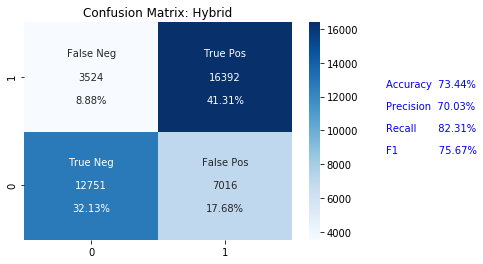

In [190]:
ypred_1 = models["bagging"].predict(x_test)
ypred_2 = models["randomforest"].predict(x_test)
ypred_3 = models["gboost"].predict(x_test)


y_best = ((ypred_1==True)*1 + (ypred_2==True)*1 + (ypred_3==True)*1)>=1

test_score = accuracy_score(y_test, y_best, normalize=True, sample_weight=None)
print("Hybrid Model Data Accuracy =", " Test Data Accuracy =", test_score)


cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_best)
TN, FP, FN, TP = cf_matrix.ravel()
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2*(precision*recall)/(precision+recall)
accuracy = (TP+TN)/(TN + FP + FN + TP)
# Work Cited: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots()
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)
ax.set_ylim([0,2])
ax.text(2.7, 1.4, 'Accuracy  ' + str(round(accuracy*100,2)) + '%', c='blue')
ax.text(2.7, 1.2, 'Precision  ' + str(round(precision*100,2)) + '%', c='blue')
ax.text(2.7, 1.0, 'Recall       ' + str(round(recall*100,2)) + '%', c='blue' )
ax.text(2.7, 0.8, 'F1             ' + str(round(F1*100,2)) + '%', c='blue' )
x =plt.title("Confusion Matrix: Hybrid")
